In [1]:
import pandas as pd
from nltk.corpus import stopwords
from scipy import stats as st
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import numpy as np


# Домашнее задание к лекции "Статистика. Практика"

## Задание 1

Вернемся к [набору данных о видеоиграх](https://github.com/obulygin/pyda_homeworks/blob/master/stat_case_study/video_games_sales.csv).

Ответьте на следующие вопросы:

1) Как критики относятся к спортивным играм?
2) Критикам нравятся больше игры на PC или на PS4?
3) Критикам больше нравятся стрелялки или стратегии?

Для каждого вопроса:
- сформулируйте нулевую и альтернативную гипотезы;
- выберите пороговый уровень статистической значимости;
- опишите полученные результаты статистического теста.

In [2]:
videogames_df = pd.read_csv('video_games_sales.csv')
videogames_df

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,...,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,...,NaN,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/2667/wii-sports/?...,1,NaN,/games/boxart/full_2258645AmericaFrontccc.jpg
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,...,NaN,NaN,NaN,NaN,1985.0,NaN,http://www.vgchartz.com/game/6455/super-mario-...,1,NaN,/games/boxart/8972270ccc.jpg
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,...,NaN,NaN,NaN,NaN,2008.0,11th Apr 18,http://www.vgchartz.com/game/6968/mario-kart-w...,1,8.7,/games/boxart/full_8932480AmericaFrontccc.jpg
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,...,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,http://www.vgchartz.com/game/215988/playerunkn...,1,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,...,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/24656/wii-sports-...,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55787,55788,Indivisible,indivisible,Role-Playing,NaN,PC,505 Games,Lab Zero Games,NaN,NaN,...,NaN,NaN,NaN,NaN,2019.0,11th Apr 19,http://www.vgchartz.com/game/224682/indivisibl...,1,NaN,/games/boxart/full_6339426AmericaFrontccc.jpg
55788,55789,Lost Ember,lost-amber,Adventure,RP,PC,Mooneye Studios,Mooneye Studios,NaN,NaN,...,NaN,NaN,NaN,NaN,2019.0,11th Apr 19,http://www.vgchartz.com/games/game.php?id=2246...,1,NaN,/games/boxart/full_8893129AmericaFrontccc.jpg
55789,55790,Lost Ember,lost-amber,Adventure,RP,PS4,Mooneye Studios,Mooneye Studios,NaN,NaN,...,NaN,NaN,NaN,NaN,2019.0,11th Apr 19,http://www.vgchartz.com/game/224690/lost-ember...,1,NaN,/games/boxart/full_6514293AmericaFrontccc.jpg
55790,55791,Lost Ember,lost-amber,Adventure,RP,XOne,Mooneye Studios,Mooneye Studios,NaN,NaN,...,NaN,NaN,NaN,NaN,2019.0,11th Apr 19,http://www.vgchartz.com/game/224688/lost-ember...,1,NaN,/games/boxart/full_6799693AmericaFrontccc.jpg


In [3]:
videogames_df.info()
# В данных есть пропуски, для получения более точных статистик лучше всего будет не заполнять пропуски, а удалить
# (хотя, конечно, любые манипуляции с пропусками понижают точность данных)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55792 entries, 0 to 55791
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rank            55792 non-null  int64  
 1   Name            55792 non-null  object 
 2   basename        55792 non-null  object 
 3   Genre           55792 non-null  object 
 4   ESRB_Rating     23623 non-null  object 
 5   Platform        55792 non-null  object 
 6   Publisher       55792 non-null  object 
 7   Developer       55775 non-null  object 
 8   VGChartz_Score  0 non-null      float64
 9   Critic_Score    6536 non-null   float64
 10  User_Score      335 non-null    float64
 11  Total_Shipped   1827 non-null   float64
 12  Global_Sales    19415 non-null  float64
 13  NA_Sales        12964 non-null  float64
 14  PAL_Sales       13189 non-null  float64
 15  JP_Sales        7043 non-null   float64
 16  Other_Sales     15522 non-null  float64
 17  Year            54813 non-null 

### Как критики относятся к спортивным играм?

Можно сравнить со средней оценкой по всем играм или провести дисперсионный анализ, сравнив все распределения между собой.

#Вариант 1. One-sample t-test.

Н0: среднее оценки спортивных игр = общее среднее
Н1: среднее оценки спортивных игры != общее среднее

Пороговый уровень статистической значимости = 0,05

In [4]:
videogames_all_mean = round(videogames_df['Critic_Score'].mean(), 3)
videogames_all_mean
# средняя оценка критиками всех игр вне зависимости от жанра

7.214

In [5]:
sport_critic_score = videogames_df[ videogames_df['Genre'] == 'Sports' ]['Critic_Score'].dropna()
sport_critic_score

# все оценки критиков данные спортивным играм

0        7.7
4        8.0
16       7.9
17       8.0
68       8.3
        ... 
50561    5.0
50730    9.2
50731    3.6
50840    4.0
51761    9.1
Name: Critic_Score, Length: 688, dtype: float64

In [6]:
result = st.ttest_1samp(sport_critic_score, videogames_all_mean)
print(result)

Ttest_1sampResult(statistic=1.380758875402541, pvalue=0.16780213107177713)


Мы не получили статистически значимый результат p-value > 0.05 (0.167), у нас недостаточно оснований отклонить гипотезу Н0.
Критики оценивают спортивные игры примерно так же как и все игры.

Возможно, это связано с тем, что в среднем по всем играм так же есть оценки по спортивным играм,
попробуем сделать аналоничный тест, но исключив из среднего оценки спортивных игр.

In [7]:
videogames_no_sports_mean = round(videogames_df[ videogames_df['Genre'] != 'Sports' ]['Critic_Score'].mean(), 3)
result_2 = st.ttest_1samp(sport_critic_score, videogames_no_sports_mean)
print(result_2)

Ttest_1sampResult(statistic=1.5412615966703354, pvalue=0.12371359463025498)


**Вывод:**
Вне зависимости от полученного среднего (по всем играм, по всем играм кроме спортивных),
мы не получили статистически значимого результата и не можем отклонить нулевую гипотезу.

У нас нет оснований считать, что критики относятся к спортивным играм лучше или хуже, чем к другим играм.

<AxesSubplot:xlabel='Genre', ylabel='Critic_Score'>

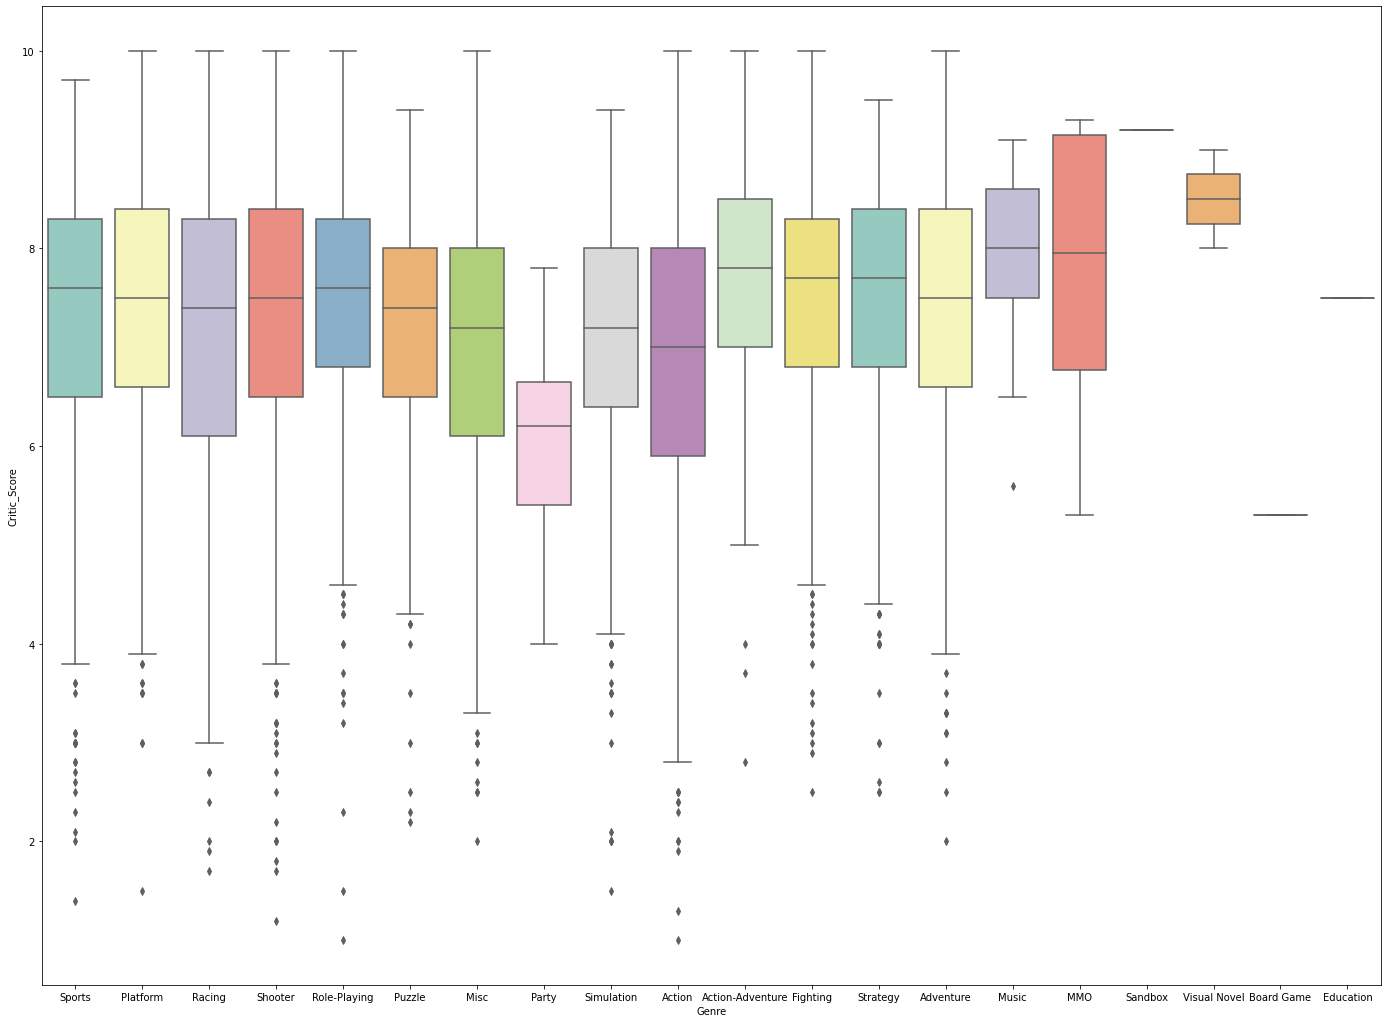

In [8]:
# посмотрим на boxplot распределения оценок играм

fig, ax = plt.subplots(figsize=(24,18))
sns.boxplot(x="Genre", y="Critic_Score",
                 data=videogames_df[['Genre', 'Critic_Score']], palette="Set3", ax=ax)

# Спортивные игры действительно имеют достаточно "среднее" распределение оценок, похожее на большинство.

#Вариант 2. Tukey HSD test

Н0: средние оценки всех жанров игр равны между собой
Н1: среднее оценки как минимум двух жанров не равны

Пороговый уровень статистической значимости = 0,05

In [9]:
videogames_filtered =  videogames_df[['Critic_Score','Genre']].dropna()

In [10]:
result_3 = pairwise_tukeyhsd(endog=videogames_filtered['Critic_Score'], groups=videogames_filtered['Genre'], alpha=0.05)

In [11]:
tukey_result_df = pd.DataFrame(result_3.summary(), columns=['group1','group2','meandiff','p-adj','lower','upper','reject'])

tukey_result_df = tukey_result_df.iloc[1:]

In [12]:
tukey_result_df = tukey_result_df.astype(str)
tukey_result_df[['meandiff','p-adj','lower','upper']] = tukey_result_df[['meandiff','p-adj','lower','upper']].astype(float)

In [13]:
tukey_result_df[
    (tukey_result_df['group1'] == 'Sports') |
    (tukey_result_df['group2'] == 'Sports')
]

,group1,group2,meandiff,p-adj,lower,upper,reject
17,Action,Sports,0.4512,0.0010,0.2001,0.7022,True
35,Action-Adventure,Sports,-0.4025,0.5001,-0.9499,0.1449,False
52,Adventure,Sports,-0.0378,0.9000,-0.3595,0.2840,False
68,Board Game,Sports,1.9914,0.9000,-3.1049,7.0877,False
83,Education,Sports,-0.2086,0.9000,-5.3049,4.8877,False
97,Fighting,Sports,-0.0970,0.9000,-0.4387,0.2447,False
110,MMO,Sports,-0.5186,0.9000,-2.1407,1.1035,False
122,Misc,Sports,0.4056,0.0035,0.0674,0.7439,True
133,Music,Sports,-0.6206,0.8200,-1.6574,0.4163,False
143,Party,Sports,1.2381,0.1055,-0.0911,2.5672,False


c:\users\ivnat\projects\netology\pyda-10\statistics_python_hw_7\venv\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


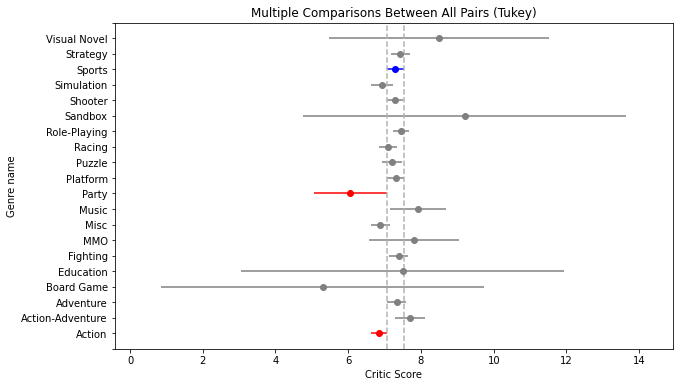

In [14]:
result_3.plot_simultaneous(comparison_name='Sports', ax=None, figsize=(10, 6), xlabel='Critic Score', ylabel='Genre name')
plt.show()

**Вывод:**

С помощью теста Тьюки мы смогли установить,
что есть статистически значимые различия между оценкой критиками спортивных игр и Party и Action.

В паре Action - Sport (p-value = 0.0010), игры жанра Action в среднем оцениваются ниже Sport.

В паре Party-Sports (p-value =0.0035), игры жанра Party в среднем оцениваются ниже Sport.

Разница в оценке между спортивными играми и другими жанрами не является статистически значимой.

Таким образом можно сказать, что критики относятся к спортивным играм лучше, чем Party и Action.
Но, скорее не потому что предпочитают спортивные игры (их они оценивают примерно так же как игры других жанров и все игры в среднем),
а потому что ниже оценивают жанры Party и Action.

### Критикам нравятся больше игры на PC или на PS4?

#Paired t-test for independent samples

Н0: средние оценки двух выборок равны
Н1: среднее оценки двух выборок не равны

Пороговый уровень статистической значимости = 0,05

<AxesSubplot:xlabel='Platform', ylabel='Critic_Score'>

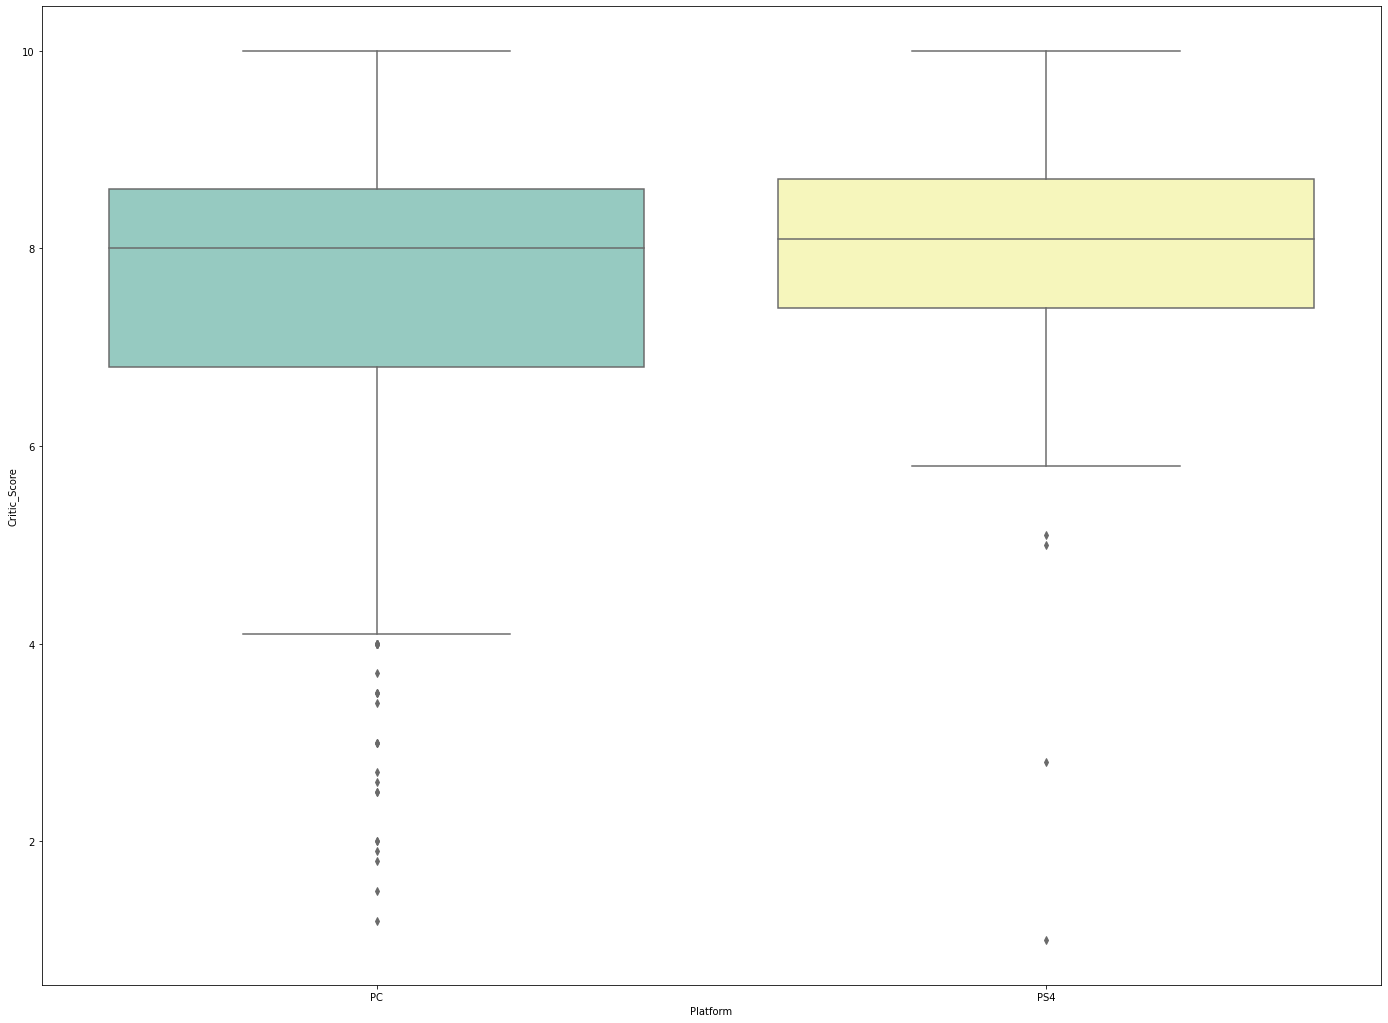

In [15]:
videogames_pc_ps4 = videogames_df[ (videogames_df['Platform'] == 'PC') |
               (videogames_df['Platform'] == 'PS4') ][['Platform', 'Critic_Score']].dropna()

fig2, ax2 = plt.subplots(figsize=(24,18))
sns.boxplot(x="Platform", y="Critic_Score",
                 data=videogames_pc_ps4, palette="Set3", ax=ax2)

In [16]:
pc_critic_score = videogames_df[ videogames_df['Platform'] == 'PC' ]['Critic_Score']
ps4_critic_score = videogames_df[ videogames_df['Platform'] == 'PS4' ]['Critic_Score']

result_4 = st.ttest_ind(pc_critic_score, ps4_critic_score, equal_var=False, nan_policy='omit')
print(result_4)

Ttest_indResult(statistic=-2.7394476056351627, pvalue=0.0069318082502542845)


**Вывод:**

Распределния оценок игр для PC и PS4 отличаются значимо, p-value < 0.05 (p = 0.006).
Значение t-value -2.7, что говорит о том, что в среднем критики оценивают игры на PS4 выше игр на PC (на 2,7 в единицах
суммарного стандартного отлонения)

Но, в данных много выбросов, особенно для PC, а t-test основывается на средних значениях, которые зависимы от выбросов.
Стоит проверить не поменяется ли результат, если исключить выбросы.

In [17]:
#убираем выбросы для PC
pc_critic_score = pc_critic_score.dropna()
pc_z_scores = np.abs(st.zscore(pc_critic_score))
videogames_pc = videogames_pc_ps4[ videogames_df['Platform'] == 'PC' ]
videogames_pc['Z-Score'] = pd.Series(pc_z_scores, index=videogames_pc.index)
videogames_pc_no_outl = videogames_pc[ videogames_pc['Z-Score'] < 3]
videogames_pc_no_outl

<ipython-input-17-2697e0968fc6>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  videogames_pc = videogames_pc_ps4[ videogames_df['Platform'] == 'PC' ]
<ipython-input-17-2697e0968fc6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  videogames_pc['Z-Score'] = pd.Series(pc_z_scores, index=videogames_pc.index)


,Platform,Critic_Score,Z-Score
9,PC,10.0,1.713759
36,PC,9.3,1.225737
55,PC,9.7,1.504607
64,PC,9.0,1.016585
75,PC,8.8,0.877150
...,...,...,...
54647,PC,8.0,0.319411
54811,PC,8.0,0.319411
54915,PC,8.3,0.528563
55090,PC,7.2,0.238329


In [18]:
#убираем выбросы для PS4
ps4_critic_score = ps4_critic_score.dropna()
ps4_z_scores = np.abs(st.zscore(ps4_critic_score))
videogames_ps4 = videogames_pc_ps4[ videogames_df['Platform'] == 'PS4' ]
videogames_ps4['Z-Score'] = pd.Series(ps4_z_scores, index=videogames_ps4.index)
videogames_ps4_no_outl = videogames_ps4[ videogames_ps4['Z-Score'] < 3]
videogames_ps4_no_outl

<ipython-input-18-a0bab11396a8>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  videogames_ps4 = videogames_pc_ps4[ videogames_df['Platform'] == 'PS4' ]
<ipython-input-18-a0bab11396a8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  videogames_ps4['Z-Score'] = pd.Series(ps4_z_scores, index=videogames_ps4.index)


,Platform,Critic_Score,Z-Score
20,PS4,9.7,1.403523
45,PS4,9.8,1.481695
50,PS4,8.0,0.074587
68,PS4,8.3,0.309105
76,PS4,8.9,0.778141
...,...,...,...
52999,PS4,8.0,0.074587
53775,PS4,7.9,0.003586
54286,PS4,9.0,0.856314
54659,PS4,8.9,0.778141


In [19]:
pc_no_outl_critic_score = videogames_pc_no_outl['Critic_Score']
ps4_no_outl_critic_score = videogames_ps4_no_outl['Critic_Score']

result_5 = st.ttest_ind(pc_no_outl_critic_score,ps4_no_outl_critic_score, equal_var=False)
print(result_5)


Ttest_indResult(statistic=-3.754927086734301, pvalue=0.0002446873584803517)


**Вывод:**
После удаления выбросов, результаты предыдущего теста подтвердились.

Различия значимы, при p-value < 0.05 (p = 0.0002). Значени p-value уменьшилось еще сильнее,
что говорит о больших основаниях в пользу отклонения гипотезы H0.

Значение t-value -3,75, что так же подтверждает - критики в среднем выше оценивают игры на PS4.


###Критикам больше нравятся стрелялки или стратегии?

#Вариант1. Paired t-test for independent samples

Н0: средние оценки двух выборок равны
Н1: среднее оценки двух выборок не равны

Пороговый уровень статистической значимости = 0,05

<AxesSubplot:xlabel='Genre', ylabel='Critic_Score'>

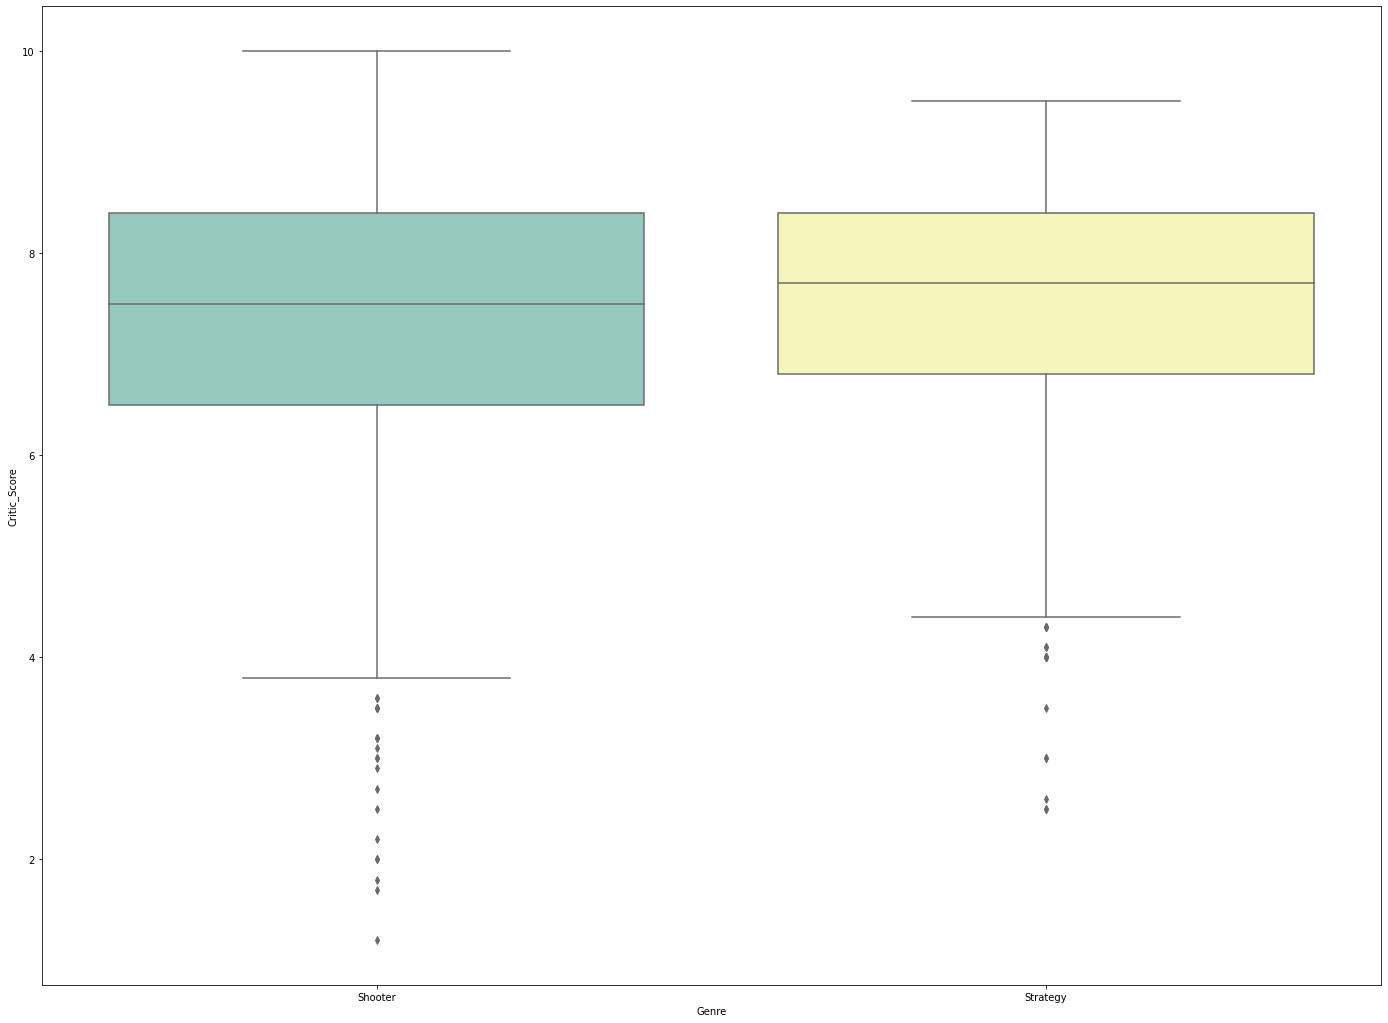

In [20]:
shooter_strategy = videogames_df[
    ( videogames_df['Genre'] == 'Shooter') |
    ( videogames_df['Genre'] == 'Strategy')
]

fig3, ax3 = plt.subplots(figsize=(24,18))
sns.boxplot(x="Genre", y="Critic_Score",
                 data=shooter_strategy, palette="Set3", ax=ax3)

In [21]:
#Т.к. в данных присутстует много выбросов, сделаем два теста - с выбросами и без.

shooter_scores = shooter_strategy[ shooter_strategy['Genre'] == 'Shooter' ]['Critic_Score']
strategy_scores = shooter_strategy[ shooter_strategy['Genre'] == 'Strategy' ]['Critic_Score']

result_6 = st.ttest_ind(shooter_scores,strategy_scores, equal_var=False, nan_policy='omit')
print(result_6)

Ttest_indResult(statistic=-1.6073949711166526, pvalue=0.10838786414222695)


In [22]:
#убираем выбросы для Shooters
shooter_scores = shooter_scores.dropna()
shooter_z_scores = np.abs(st.zscore(shooter_scores))
videogames_shooters = shooter_strategy[ shooter_strategy['Genre'] == 'Shooter' ][['Genre', 'Critic_Score']].dropna()
videogames_shooters['Z-Score'] = pd.Series(shooter_z_scores, index=videogames_shooters.index)
videogames_shooters_no_outl = videogames_shooters[ videogames_shooters['Z-Score'] < 3]
videogames_shooters_no_outl

,Genre,Critic_Score,Z-Score
36,Shooter,9.3,1.349800
40,Shooter,8.7,0.947508
41,Shooter,8.8,1.014557
43,Shooter,9.6,1.550946
49,Shooter,9.5,1.483897
...,...,...,...
52437,Shooter,6.4,0.594609
52438,Shooter,6.1,0.795754
52461,Shooter,6.0,0.862803
54119,Shooter,7.4,0.075877


In [23]:
#убираем выбросы для Strategy
strategy_scores = strategy_scores.dropna()
strategy_z_scores = np.abs(st.zscore(strategy_scores))
videogames_strategy = shooter_strategy[ shooter_strategy['Genre'] == 'Strategy' ][['Genre', 'Critic_Score']].dropna()
videogames_strategy['Z-Score'] = pd.Series(strategy_z_scores, index=videogames_strategy.index)
videogames_strategy_no_outl = videogames_strategy[ videogames_strategy['Z-Score'] < 3]
videogames_strategy_no_outl


,Genre,Critic_Score,Z-Score
86,Strategy,8.3,0.628821
92,Strategy,8.7,0.917691
210,Strategy,7.5,0.051081
305,Strategy,9.3,1.350996
306,Strategy,9.3,1.350996
...,...,...,...
52481,Strategy,5.2,1.609922
52511,Strategy,6.7,0.526660
52514,Strategy,6.1,0.959965
52884,Strategy,7.0,0.310007


In [24]:
shooters_no_outl_critic_score = videogames_shooters_no_outl['Critic_Score']
strategy_no_outl_critic_score = videogames_strategy_no_outl['Critic_Score']

result_7 = st.ttest_ind(shooters_no_outl_critic_score,strategy_no_outl_critic_score, equal_var=False)
print(result_7)

Ttest_indResult(statistic=-1.8892702177758738, pvalue=0.059238868874795854)


In [25]:
tukey_result_df[
    (tukey_result_df['group1'] == 'Shooter') &
    (tukey_result_df['group2'] == 'Strategy')
]

,group1,group2,meandiff,p-adj,lower,upper,reject
183,Shooter,Strategy,0.1424,0.9,-0.1754,0.4603,False


c:\users\ivnat\projects\netology\pyda-10\statistics_python_hw_7\venv\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


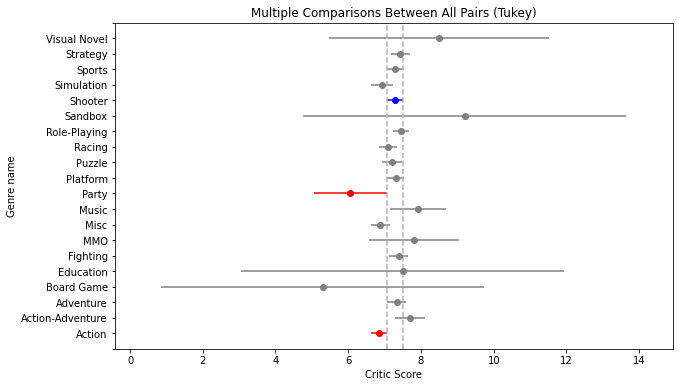

In [26]:
result_3.plot_simultaneous(comparison_name='Shooter', ax=None, figsize=(10, 6), xlabel='Critic Score', ylabel='Genre name')
plt.show()

**Вывод:**
Все проведенные тесты говорят о том, что значимых различий между распределением оценок жанров Shooter и Strategy - нет.

1. t-test с поправкой на разность дисперсий, с выбросами в данных - p-value=0.1
2. t-test с поправкой на разность дисперсий, без выбросов в данных - p-value=0.59
3. Tukey HSK, p-value = 0.9

Мы можем сказать, что в среднем критики одинаково относятся к шутерам и стратегиям


In [27]:
import pandas as pd
from nltk.corpus import stopwords
from scipy import stats as st
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import numpy as np


## Задание 2

Реализуйте базовую модель логистической регрессии для классификации текстовых сообщений (используемые данные [здесь](https://github.com/obulygin/pyda_homeworks/blob/master/stat_case_study/spam.csv)) по признаку спама. Для этого:

1) Привидите весь текст к нижнему регистру;
2) Удалите мусорные символы;
3) Удалите стоп-слова;
4) Привидите все слова к нормальной форме;
5) Преобразуйте все сообщения в вектора TF-IDF. Вам поможет следующий код:

```
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df.Message)
names = tfidf.get_feature_names()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=cname)
```

Можете поэкспериментировать с параметрами [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html);
6) Разделите данные на тестовые и тренировочные в соотношении 30/70, укажите `random_state=42`. Используйте [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html);
7) Постройте модель [логистической регрессии](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), укажите `random_state=42`, оцените ее точность на тестовых данных;
8) Опишите результаты при помощи [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html?highlight=confusion_matrix#sklearn.metrics.confusion_matrix);
9) Постройте датафрейм, который будет содержать все исходные тексты сообщений, классифицированные неправильно (с указанием фактического и предсказанного).


In [28]:
import sklearn
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ivnat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ivnat\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [29]:
#чтение файла
text = pd.read_csv('spam.csv')
text

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [30]:
#приведение текста к нижнему регистру
text_lower_case = text.copy()
text_lower_case['Message'] = text_lower_case['Message'].str.lower()
text_lower_case

,Category,Message
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...
5568,ham,will ü b going to esplanade fr home?
5569,ham,"pity, * was in mood for that. so...any other s..."
5570,ham,the guy did some bitching but i acted like i'd...


In [31]:
#убираем мусорные символы

text_words_only = text_lower_case.copy()
text_words_only['Message'] = text_words_only['Message'].str.replace('[\W_]+',' ', regex=True)
text_words_only

,Category,Message
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor u c already then say
4,ham,nah i don t think he goes to usf he lives arou...
...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...
5568,ham,will ü b going to esplanade fr home
5569,ham,pity was in mood for that so any other suggest...
5570,ham,the guy did some bitching but i acted like i d...


In [32]:
#получаем список слов для каждого сообщения
texts_words_lists = text_words_only.copy()
texts_words_lists['Message'] = texts_words_lists['Message'].str.split()
texts_words_lists

,Category,Message
0,ham,"[go, until, jurong, point, crazy, available, o..."
1,ham,"[ok, lar, joking, wif, u, oni]"
2,spam,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,ham,"[u, dun, say, so, early, hor, u, c, already, t..."
4,ham,"[nah, i, don, t, think, he, goes, to, usf, he,..."
...,...,...
5567,spam,"[this, is, the, 2nd, time, we, have, tried, 2,..."
5568,ham,"[will, ü, b, going, to, esplanade, fr, home]"
5569,ham,"[pity, was, in, mood, for, that, so, any, othe..."
5570,ham,"[the, guy, did, some, bitching, but, i, acted,..."


In [33]:
#удаляем стоп-слова
def delete_stop_words(line):
    new_line = []
    for word in line:
        if word not in stopwords_set:
            new_line.append(word)
    return new_line

In [34]:
stopwords_set = set(stopwords.words('english'))
texts_no_stopwords = texts_words_lists.copy()
texts_no_stopwords['Message'] = texts_no_stopwords['Message'].apply(delete_stop_words)
texts_no_stopwords

,Category,Message
0,ham,"[go, jurong, point, crazy, available, bugis, n..."
1,ham,"[ok, lar, joking, wif, u, oni]"
2,spam,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"[nah, think, goes, usf, lives, around, though]"
...,...,...
5567,spam,"[2nd, time, tried, 2, contact, u, u, 750, poun..."
5568,ham,"[ü, b, going, esplanade, fr, home]"
5569,ham,"[pity, mood, suggestions]"
5570,ham,"[guy, bitching, acted, like, interested, buyin..."


In [35]:
#производим лемматизацию
wordnet_lemmatizer = nltk.WordNetLemmatizer()
lemmatized_text = texts_no_stopwords.copy()
lemmatized_text['Message'] = lemmatized_text['Message']\
    .apply(lambda row: [wordnet_lemmatizer.lemmatize(w) for w in row])

In [36]:
lemmatized_text['Message'] = lemmatized_text['Message'].apply(lambda x: ','.join(map(str, x)))
lemmatized_text

,Category,Message
0,ham,"go,jurong,point,crazy,available,bugis,n,great,..."
1,ham,"ok,lar,joking,wif,u,oni"
2,spam,"free,entry,2,wkly,comp,win,fa,cup,final,tkts,2..."
3,ham,"u,dun,say,early,hor,u,c,already,say"
4,ham,"nah,think,go,usf,life,around,though"
...,...,...
5567,spam,"2nd,time,tried,2,contact,u,u,750,pound,prize,2..."
5568,ham,"ü,b,going,esplanade,fr,home"
5569,ham,"pity,mood,suggestion"
5570,ham,"guy,bitching,acted,like,interested,buying,some..."


In [37]:
#Преобразуйте все сообщения в вектора TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(lemmatized_text.Message)
names = tfidf.get_feature_names()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)
tfidf_matrix

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,ú1,〨ud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
# смэтчим индексы с реальными словами

In [39]:
#Разделить данные на тестовые и тренировочные
X = tfidf_matrix
y = lemmatized_text['Category']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

In [40]:
#Обучаем модель
clf = LogisticRegression(random_state=42).fit(X_train, y_train,)

In [41]:
#Делаем предсказание
clf.predict(X_test)

array(['ham', 'ham', 'ham', ..., 'ham', 'spam', 'ham'], dtype=object)

In [42]:
#Оцениваем качество работы модели
clf.score(X_test, y_test)

0.958732057416268

In [43]:
#Строим confusion_matrix

y_pred = clf.predict(X_test)

confusion_matrix = confusion_matrix(y_test, y_pred, labels=['spam', 'ham'])
confusion_matrix = pd.DataFrame(confusion_matrix)
confusion_matrix.columns = ['spam_pred', 'ham_pred']
confusion_matrix.index = ['spam_true', 'ham_true']
confusion_matrix

,spam_pred,ham_pred
spam_true,158,66
ham_true,3,1445


In [44]:
print(
    f'Верно распознанный спам:{confusion_matrix["spam_pred"]["spam_true"]} \n'
    f'Верно распознанное обычное сообщение:{confusion_matrix["ham_pred"]["ham_true"]} \n'
    f'Неверно распознанный спам (спам отметили как обычное сообщение):{confusion_matrix["ham_pred"]["spam_true"]} \n'
    f'Неверно распознанное обычное сообщение (отметили как спам):{confusion_matrix["spam_pred"]["ham_true"]} \n'
)

Верно распознанный спам:158 
Верно распознанное обычное сообщение:1445 
Неверно распознанный спам (спам отметили как обычное сообщение):66 
Неверно распознанное обычное сообщение (отметили как спам):3 



In [45]:
#Объединяем тестовые данные в датафрейм содержащий категорию и предсказание
tested_df = pd.DataFrame(y_test)
tested_df['pred'] = y_pred
tested_df

,Category,pred
3245,ham,ham
944,ham,ham
1044,ham,ham
2484,ham,ham
812,ham,ham
...,...,...
2505,ham,ham
2525,spam,spam
4975,ham,ham
650,spam,spam


In [46]:
#Получаем индексы текстового дф для последующей фильтрации
y_test = y_test.sort_index()
tested_idx_list = y_test.index.to_list()
len(tested_idx_list)

1672

In [47]:
#Фильтруем изначальный дф
filtered_text_df  = text[text.index.isin(tested_idx_list)]
filtered_text_df

,Category,Message
8,spam,WINNER!! As a valued network customer you have...
12,spam,URGENT! You have won a 1 week FREE membership ...
15,spam,"XXXMobileMovieClub: To use your credit, click ..."
17,ham,Eh u remember how 2 spell his name... Yes i di...
19,spam,England v Macedonia - dont miss the goals/team...
...,...,...
5558,ham,"Sorry, I'll call later"
5561,ham,Get me out of this dump heap. My mom decided t...
5565,ham,Huh y lei...
5567,spam,This is the 2nd time we have tried 2 contact u...


In [48]:
#Объединяем сообщения, категории и предсказания
tested_df = tested_df.sort_index()
tested_df['Message'] = filtered_text_df['Message']
tested_df

,Category,pred,Message
8,spam,spam,WINNER!! As a valued network customer you have...
12,spam,spam,URGENT! You have won a 1 week FREE membership ...
15,spam,ham,"XXXMobileMovieClub: To use your credit, click ..."
17,ham,ham,Eh u remember how 2 spell his name... Yes i di...
19,spam,ham,England v Macedonia - dont miss the goals/team...
...,...,...,...
5558,ham,ham,"Sorry, I'll call later"
5561,ham,ham,Get me out of this dump heap. My mom decided t...
5565,ham,ham,Huh y lei...
5567,spam,spam,This is the 2nd time we have tried 2 contact u...


In [49]:
#Получаем датафрейм, который содержит все исходные тексты сообщений, классифицированные неправильно
text_mistakes = tested_df[ tested_df['Category'] != tested_df['pred'] ]
text_mistakes





,Category,pred,Message
15,spam,ham,"XXXMobileMovieClub: To use your credit, click ..."
19,spam,ham,England v Macedonia - dont miss the goals/team...
68,spam,ham,"Did you hear about the new ""Divorce Barbie""? I..."
95,spam,ham,Your free ringtone is waiting to be collected....
135,spam,ham,Want 2 get laid tonight? Want real Dogging loc...
...,...,...,...
4652,spam,ham,A £400 XMAS REWARD IS WAITING FOR YOU! Our com...
5037,spam,ham,You won't believe it but it's true. It's Incre...
5120,spam,ham,PRIVATE! Your 2003 Account Statement for 078
5366,spam,ham,A £400 XMAS REWARD IS WAITING FOR YOU! Our com...
